In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
principal_matrix= np.loadtxt("principal_matrix.csv", delimiter= ",")
with open("labels.csv") as f:
    l= f.read()
    l= l[3:]
    labels= np.array(l.split(), dtype= int)

print(np.count_nonzero(labels)/labels.size)
print(np.count_nonzero(principal_matrix)/principal_matrix.size)

nonzero_index= labels!= 0
labels= labels[nonzero_index]
principal_matrix= principal_matrix[nonzero_index]


0.8186157517899761
1.0


In [26]:
X_train, X_test, y_train, y_test= train_test_split(principal_matrix, labels, test_size= .2, random_state= 42)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

svr= SVR(C= 100, gamma= .1, epsilon= .1)

In [27]:
svr.fit(X_train, y_train)

y_pred= svr.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2988.1480576987415
R^2 Score: -0.1288275442747997


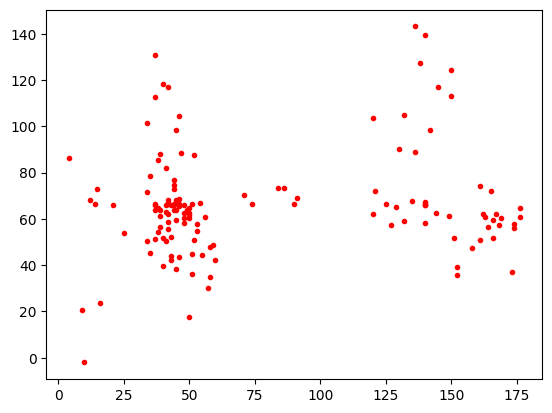

In [28]:
plt.plot(y_test, y_pred, "r.")